## Prathmesh Urkude
## A3_51

### SIFT (Scale-Invariant Feature Transform)

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
img1 = cv2.imread('Cube1.jpg')
img2 = cv2.imread('Cube2.jpg')

In [23]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

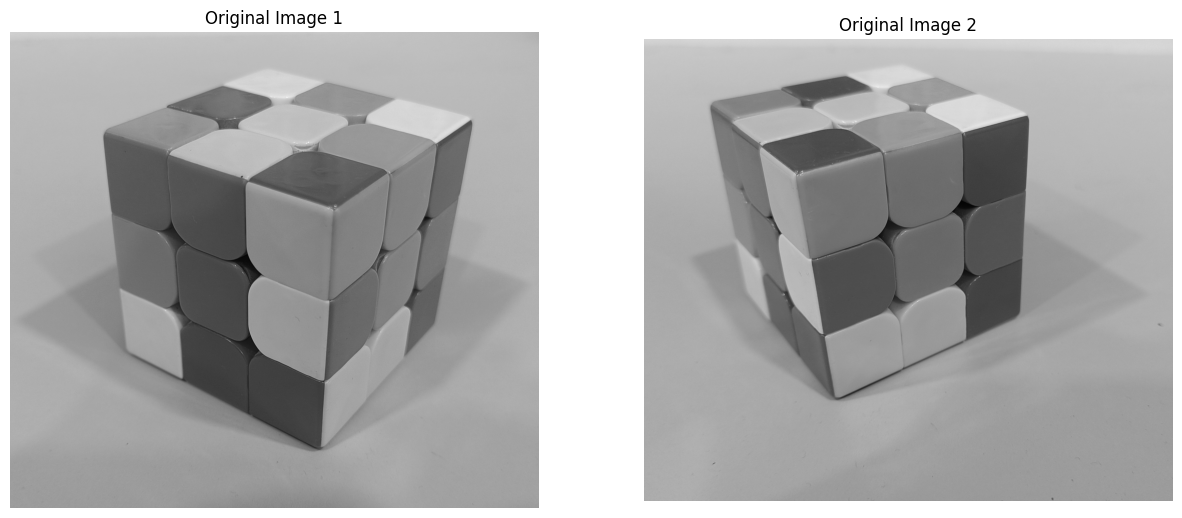

In [37]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image 1')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Original Image 2')
plt.axis("off")

plt.show()

In [27]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# FLANN-based matcher parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Create FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors using KNN (k=2)
matches = flann.knnMatch(descriptors1, descriptors2, k=2) 

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
result_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

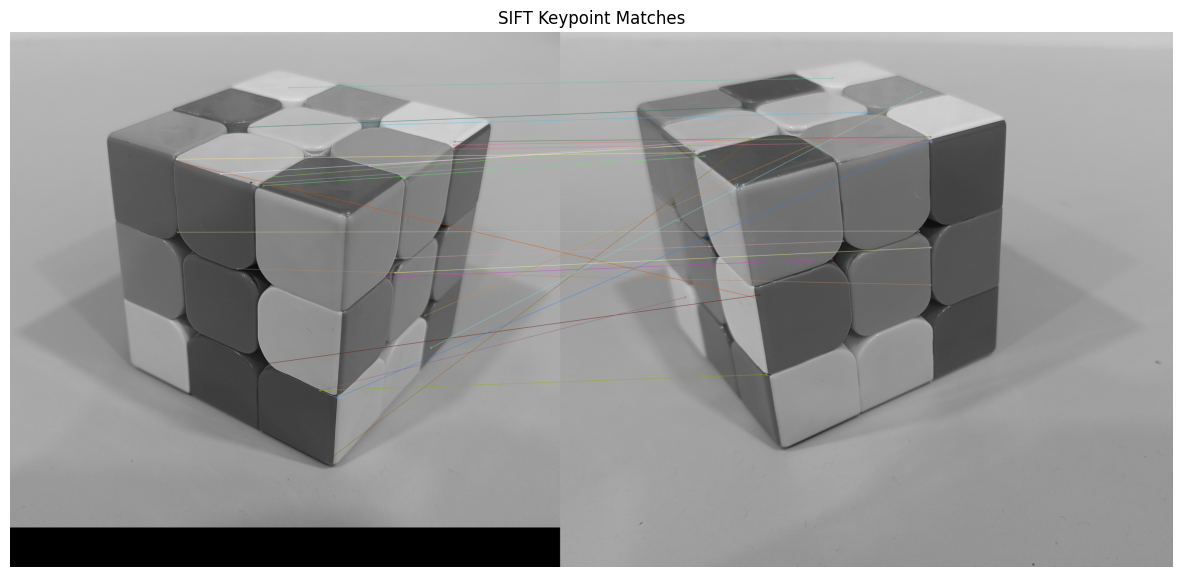

In [28]:
plt.figure(figsize=(15, 10))
plt.imshow(result_img, cmap='gray')
plt.title('SIFT Keypoint Matches')
plt.axis('off')
plt.show()

In [33]:
good_matches = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good_matches.append(m)

# Draw matches
result_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

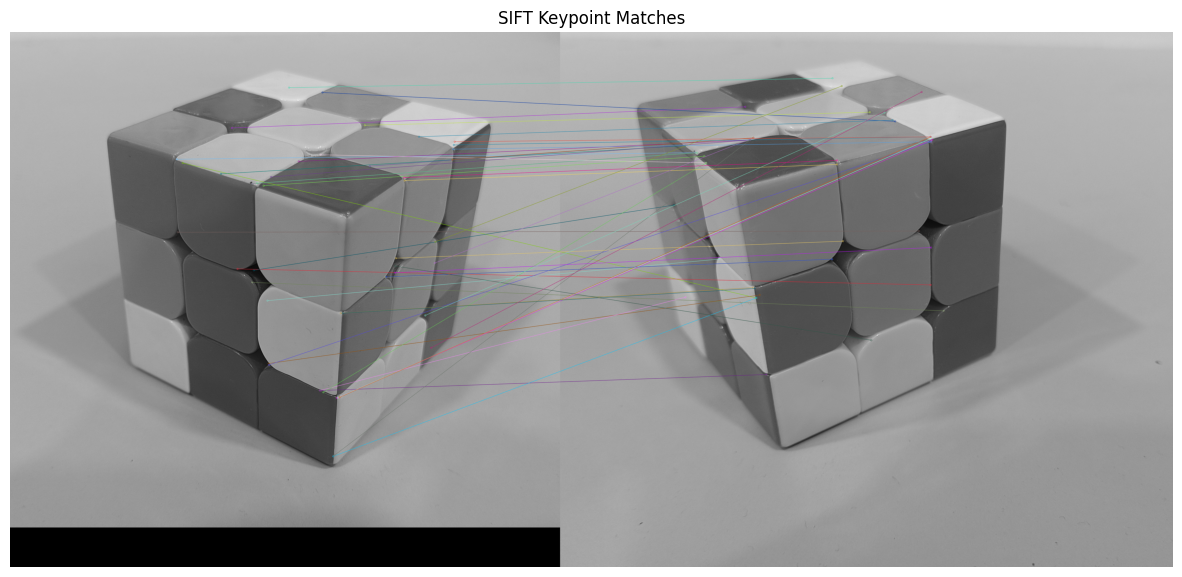

In [35]:
plt.figure(figsize=(15, 10))
plt.imshow(result_img, cmap='gray')
plt.title('SIFT Keypoint Matches')
plt.axis('off')
plt.show()